# Infosys 722 Iteration 4 BDAS

Author: Yuqing Qu 

UPI: yqu270 

GitHub Link: https://github.com/beckyqu/Infosys722_Iteration4

## Import 

In [4]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Iteration4').getOrCreate()
import pandas
import matplotlib.pyplot as plt

In [8]:
# Importing data
marketData = spark.read.csv('marketing_campaign.csv', header=True, inferSchema=True)


## Step 2. Data Understanding 

### 2.1 Collecting Initial Data

In [9]:
# Observe the data
marketData.show(2)

22/10/11 17:43:43 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+----+----------+----------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+------------+------------+------------+------------+------------+--------+-------------+---------+--------+
|  ID|Year_Birth| Education|Marital_Status|Income|Kidhome|Teenhome|Dt_Customer|Recency|MntWines|MntFruits|MntMeatProducts|MntFishProducts|MntSweetProducts|MntGoldProds|NumDealsPurchases|NumWebPurchases|NumCatalogPurchases|NumStorePurchases|NumWebVisitsMonth|AcceptedCmp3|AcceptedCmp4|AcceptedCmp5|AcceptedCmp1|AcceptedCmp2|Complain|Z_CostContact|Z_Revenue|Response|
+----+----------+----------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+----------

### 2.2 Describing Data

In [10]:
# extracting number of rows 
row = marketData.count()
print("Number of Row:", row) 
# extracting number of columns
col = len(marketData.columns)
print("Number of Columns:", col)

Number of Row: 2240
Number of Columns: 29


In [30]:
# data structure 
marketData.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Year_Birth: integer (nullable = true)
 |-- Education: string (nullable = true)
 |-- Marital_Status: string (nullable = true)
 |-- Income: integer (nullable = true)
 |-- Kidhome: integer (nullable = true)
 |-- Teenhome: integer (nullable = true)
 |-- Dt_Customer: string (nullable = true)
 |-- Recency: integer (nullable = true)
 |-- MntWines: integer (nullable = true)
 |-- MntFruits: integer (nullable = true)
 |-- MntMeatProducts: integer (nullable = true)
 |-- MntFishProducts: integer (nullable = true)
 |-- MntSweetProducts: integer (nullable = true)
 |-- MntGoldProds: integer (nullable = true)
 |-- NumDealsPurchases: integer (nullable = true)
 |-- NumWebPurchases: integer (nullable = true)
 |-- NumCatalogPurchases: integer (nullable = true)
 |-- NumStorePurchases: integer (nullable = true)
 |-- NumWebVisitsMonth: integer (nullable = true)
 |-- AcceptedCmp3: integer (nullable = true)
 |-- AcceptedCmp4: integer (nullable = true)
 |-- AcceptedC

### 2.3 Data Exploration 

#### 2.3.1 Exploration of most important predictors (features)

In [13]:
# Count the missing values
pd = marketData.toPandas()
pd.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

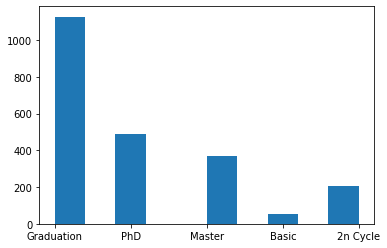

In [35]:
# Histogram of Education
plt.hist(pd['Education'])
plt.show()


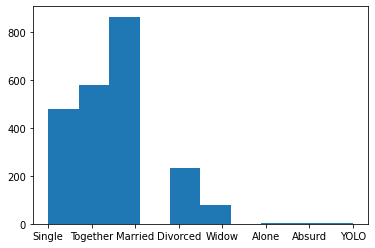

In [36]:
# Histogram of Marital_Status
plt.hist(pd['Marital_Status'])
plt.show()

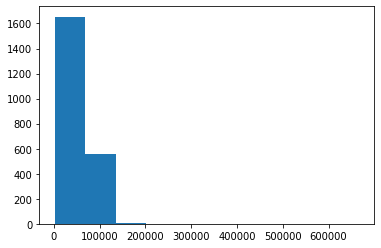

In [37]:
# Histogram of Income
plt.hist(pd['Income'])
plt.show()

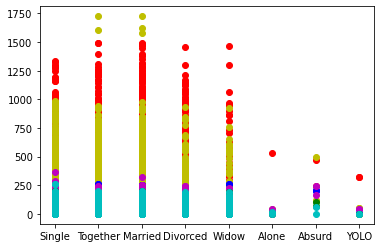

In [38]:
# Multiplot of Expenses VS Marital_Status
plt.scatter(pd['Marital_Status'], pd['MntWines'], color='r', label='MntWins')
plt.scatter(pd['Marital_Status'], pd['MntMeatProducts'], color='y', label='MntMeatProducts')
plt.scatter(pd['Marital_Status'], pd['MntFishProducts'], color='b', label='MntFishProducts')
plt.scatter(pd['Marital_Status'], pd['MntGoldProds'], color='m', label='MntGoldProds')
plt.scatter(pd['Marital_Status'], pd['MntFruits'], color='g', label='MntFruits')
plt.scatter(pd['Marital_Status'], pd['MntSweetProducts'], color='c', label='MntSweetProducts')
plt.show()

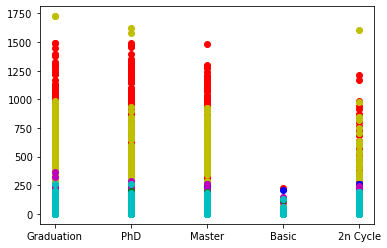

In [39]:
# Multiplot of Expenses VS Education
plt.scatter(pd['Education'], pd['MntWines'], color='r', label='MntWins')
plt.scatter(pd['Education'], pd['MntMeatProducts'], color='y', label='MntMeatProducts')
plt.scatter(pd['Education'], pd['MntFishProducts'], color='b', label='MntFishProducts')
plt.scatter(pd['Education'], pd['MntGoldProds'], color='m', label='MntGoldProds')
plt.scatter(pd['Education'], pd['MntFruits'], color='g', label='MntFruits')
plt.scatter(pd['Education'], pd['MntSweetProducts'], color='c', label='MntSweetProducts')
plt.show()

### 2.4 Verifying Data Quality

In [17]:
marketData.describe().show()

+-------+------------------+------------------+---------+--------------+------------------+-------------------+------------------+-----------+-----------------+------------------+------------------+-----------------+------------------+-----------------+----------------+-----------------+------------------+-------------------+-----------------+-----------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------+---------+-------------------+
|summary|                ID|        Year_Birth|Education|Marital_Status|            Income|            Kidhome|          Teenhome|Dt_Customer|          Recency|          MntWines|         MntFruits|  MntMeatProducts|   MntFishProducts| MntSweetProducts|    MntGoldProds|NumDealsPurchases|   NumWebPurchases|NumCatalogPurchases|NumStorePurchases|NumWebVisitsMonth|       AcceptedCmp3|       AcceptedCmp4|       AcceptedCmp5|       AcceptedCmp1|        AcceptedCmp2|       

In [18]:
marketData.describe(['Income']).show()

+-------+------------------+
|summary|            Income|
+-------+------------------+
|  count|              2216|
|   mean| 52247.25135379061|
| stddev|25173.076660901414|
|    min|              1730|
|    max|            666666|
+-------+------------------+



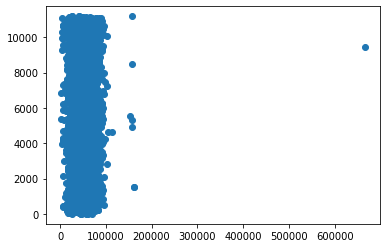

In [20]:
plt.scatter(pd['Income'],pd['ID'])
plt.show()

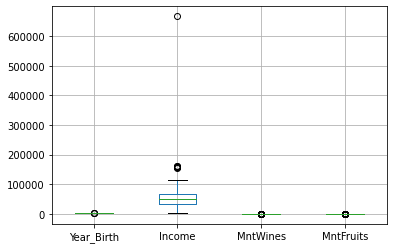

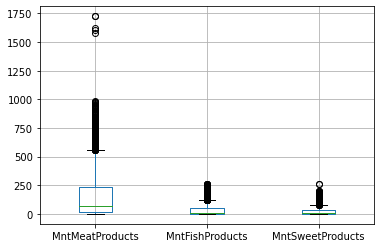

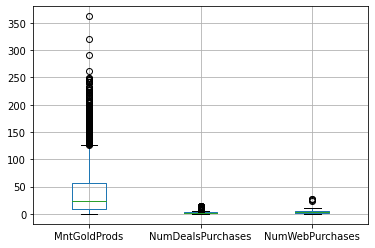

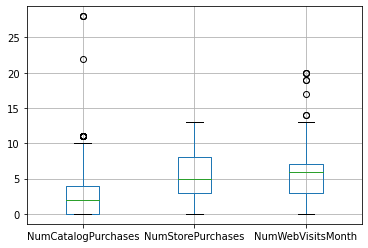

In [21]:
numeric_col1 = ['Year_Birth','Income', 'MntWines', 'MntFruits']
numeric_col2 = ['MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']
numeric_col3 = ['MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases']
numeric_col4 = ['NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
categorical_col = ['Education','Marital_Status','Dt_Customer']

pd.boxplot(numeric_col1)
plt.show()

pd.boxplot(numeric_col2)
plt.show()

pd.boxplot(numeric_col3)
plt.show()

pd.boxplot(numeric_col4)
plt.show()